## SML310 Mini Project #2 -- Classification
#### Mia Rosini

In [46]:
import numpy as np
import pandas as pd
import sklearn 
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import os 

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline 

from sklearn.model_selection import cross_val_score 
from sklearn import datasets
import numpy as np
from sklearn.feature_selection import RFE

### 1. Comparing Classification Models 

##### a. Please use the scikit-learn breast cancer dataset and perform a randomized (20%/80%) test/train split of the data to allow for model cross-validation in later steps

References: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8, https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [5]:
cancer = sklearn.datasets.load_breast_cancer()

#Make into panda dataframe
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

#Add the target: breast cancer or not breast cancer? 
cancer_df["BC"] = cancer.target

In [6]:
#Independent and Dependent variables 

X = np.array(cancer_df.loc[:,cancer_df.columns != 'BC'])
#X = np.array(cancer_df["worst concavity"])

Y = np.array(cancer_df["BC"])

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##### b. Please perform an exploratory data analysis on your training set to gain intuition for your modeling efforts. Do you notice anything interesting? Which features seems most important?

In [8]:
## What is the data about? 
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [9]:
## How much data do we have?
cancer_df.shape

(569, 31)

In [10]:
## What about some basic statistics on the data?
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,BC
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [11]:
print(cancer['target_names'])

['malignant' 'benign']


In [12]:
cancer_df.groupby('BC').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
BC,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [37]:
cancer_df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,BC
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


The features that seem particulary important are mean concave points, worst radius, worst perimeter, worst area, worst concave points. I chose these features because these features are most closely correlated with the target feature, breast cancer.

##### c. Please create a binary classification model on your training set to predict which data samples are benign or malignant, and make a confusion matrix to report your results.

References: https://stackabuse.com/classification-in-python-with-scikit-learn-and-pandas/; https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/, https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/; https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

In [13]:
#K Nearest Neighbors Classifier 
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)
y_pred1 = classifier.predict(X_test)
print(confusion_matrix(Y_test, y_pred1))

[[31  3]
 [ 0 80]]


#### d. For this classification problem, what do you feel is the most appropriate way to measure the "goodness" of the model? Please carefully explain your reasoning

In [14]:
print(classification_report(Y_test, y_pred1))

#Accuracy Score
print('Accuracy Score: ', metrics.accuracy_score(Y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        34
           1       0.96      1.00      0.98        80

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy Score:  0.9736842105263158


I think the accuracy score is the most appropriate way to measure the goodness of the model. It tells the percentage of correct predictions we made in this model. This gives us a great idea of how accurate, and thus how "good", the model is. In addition, the precision and recall scores tell us the proportion of positive identifications that are correct and the the proportion of actual positives that were identified correctly, respectively. 

#### e. Please repeat part 1c for each of the following types of classification models, choosing parameters that seem appropriate to give a good model. For each model you make, record the confusion matrix and how well the model performs for the "goodness" metric you decide on in part 1d

references: Projects from ELE364 Class, https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html, https://scikit-learn.org/stable/modules/naive_bayes.html,https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a, https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python, https://scikit-learn.org/stable/modules/tree.html

i. Nearest Neighbors - see work from l.c.

In [15]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

#Predict on Test Set
y_predNN = classifier.predict(X_test)

#Accuracy Score
print('Accuracy Score (Test): ',  metrics.accuracy_score(Y_test, y_predNN))

Accuracy Score (Test):  0.9736842105263158


ii. Naive Bayes

In [16]:
gnb = GaussianNB()
y_predNB = gnb.fit(X_train, Y_train).predict(X_test)
print(confusion_matrix(Y_test, y_predNB))
print(classification_report(Y_test, y_predNB))

#Accuracy Score
print('Accuracy Score: ', metrics.accuracy_score(Y_test, y_predNB))

[[30  4]
 [ 4 76]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        34
           1       0.95      0.95      0.95        80

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Accuracy Score:  0.9298245614035088


iii. Logistic Regression

In [17]:
import warnings
warnings.filterwarnings("ignore")

logreg = LogisticRegression()
fitted = logreg.fit(X_train, Y_train)
y_predLR = logreg.predict(X_test)

print(confusion_matrix(Y_test, y_predLR))
print(classification_report(Y_test, y_predLR))

#Accuracy Score
print('Accuracy Score (Test): ', metrics.accuracy_score(Y_test, y_predLR))

[[31  3]
 [ 1 79]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        34
           1       0.96      0.99      0.98        80

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy Score (Test):  0.9649122807017544


iv. Support Vector Machines 

In [18]:
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(X_train, Y_train)

y_predSV = svclassifier.predict(X_test)

print(confusion_matrix(Y_test, y_predSV))
print(classification_report(Y_test, y_predSV))

print('Accuracy Score (Test): ', metrics.accuracy_score(Y_test, y_predSV))

[[31  3]
 [ 2 78]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.96      0.97      0.97        80

    accuracy                           0.96       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy Score (Test):  0.956140350877193


v. Decision Trees

In [19]:
decision = DecisionTreeClassifier()
decision = decision.fit(X_train, Y_train)

#Predict on test set 
y_predDT = decision.predict(X_test)

print(confusion_matrix(Y_test, y_predDT))
print(classification_report(Y_test, y_predDT))

#Accuracy Score
print('Accuracy Score (Test): ', metrics.accuracy_score(Y_test, y_predDT))

[[30  4]
 [ 4 76]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        34
           1       0.95      0.95      0.95        80

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Accuracy Score (Test):  0.9298245614035088


vi. Random Forests

In [51]:
rf = RandomForestClassifier(n_estimators = 1000)

#train model on training data
rf = rf.fit(X_train, Y_train)

#predict on test data
y_predRF = rf.predict(X_test)

print(confusion_matrix(Y_test, y_predRF))
print(classification_report(Y_test, y_predRF))

#Accuracy Score
print('Accuracy Score (Test): ', metrics.accuracy_score(Y_test, y_predRF))

[[29  5]
 [ 4 76]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        34
           1       0.94      0.95      0.94        80

    accuracy                           0.92       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.92      0.92      0.92       114

Accuracy Score (Test):  0.9210526315789473


#### f. What model performed the best on the training data, and how well did they perform in general?

The Decision Tree and Random Forsts Models both performed the best with an accuracy score of 1. However, all models performed exceptionally well. All models had an accuracy score above 0.94.

In [21]:
#K Nearest Neighbors 
y_pred1 = classifier.predict(X_train)
print('KNN Accuracy Score: ',  metrics.accuracy_score(Y_train, y_pred1))

#Naive Bayes 
y_pred2 = gnb.fit(X_train, Y_train).predict(X_train)
print('Naive Bayes Accuracy Score: ', metrics.accuracy_score(Y_train, y_pred2))

#Logistic Regression
y_pred3 = logreg.predict(X_train)
print('Log Reg Accuracy Score: ', metrics.accuracy_score(Y_train, y_pred3))

#Support Vector Machines
y_pred4 = svclassifier.predict(X_train)
print('SVM Accuracy Score: ', metrics.accuracy_score(Y_train, y_pred4))

#Decision Tree 
y_pred5 = decision.predict(X_train)
print('Decision Tree Accuracy Score: ', metrics.accuracy_score(Y_train, y_pred5))

#Random Forests
y_pred6 = rf.predict(X_train)
print('Random Forests Accuracy Score: ', metrics.accuracy_score(Y_train, y_pred5))

KNN Accuracy Score:  0.9802197802197802
Naive Bayes Accuracy Score:  0.9472527472527472
Log Reg Accuracy Score:  0.9912087912087912
SVM Accuracy Score:  0.989010989010989
Decision Tree Accuracy Score:  1.0
Random Forests Accuracy Score:  1.0


#### g. Which model performed the best on the testing data, and how well did they perform in general?

The best model is the Logistic Regression Model. All the models performed relatively well with all having a highest accuracy score of 0.92. 

In [22]:
#Nearest Neighbors 
print('KNN Accuracy Score: ',  metrics.accuracy_score(Y_test, y_predNN))

#Naive Bayes
print('Naive Bayes Accuracy Score: ', metrics.accuracy_score(Y_test, y_predNB))

#Logistic Regression
print('Log Reg Accuracy Score: ', metrics.accuracy_score(Y_test, y_predLR))

#Support Vector Machines
print('SVM Accuracy Score: ', metrics.accuracy_score(Y_test, y_predSV))

#Decision Tree
print('Decision Tree Accuracy Score: ', metrics.accuracy_score(Y_test, y_predDT))

#Random Forests
print('Random Forest Accuracy Score: ', metrics.accuracy_score(Y_test, y_predRF))

KNN Accuracy Score:  0.9736842105263158
Naive Bayes Accuracy Score:  0.9298245614035088
Log Reg Accuracy Score:  0.9649122807017544
SVM Accuracy Score:  0.956140350877193
Decision Tree Accuracy Score:  0.9298245614035088
Random Forest Accuracy Score:  0.9210526315789473


#### h. Compare the model performance on the testing and training data to see if any of your models were overfit

Since the accuracy scores of the testing and training datasets are similar, overfitting is unlikely.

## 2. Explaining your model

#### a. Please explain which features are the most important in each of your models in part 1e? Is this similar across all models? How does this agree with your expectations from part 1b? Please carefully explain your meaning

Below, I have determined which features are the most important in each of my models. The important features are similar across models; the SVM and decision tree model have the exact same features, and the nearest neighbors and Naive Bayes models have the same 6 most important features. 

They do agree with the majority of my expectations from part 1b. In 1b, I thought the  mean concave points, worst radius, worst perimeter, worst area, worst concave points were the most important features. These features were identified in the majority of my analysis below.

References: https://www.datacamp.com/community/tutorials/feature-selection-python; https://stackoverflow.com/questions/42088336/how-to-get-the-most-contributing-feature-in-any-classifier-sklearn-for-example-d

In [45]:
#Nearest Neighbors
n_feats = cancer.data.shape[1]

print('Feature Accuracy')
for i in range(n_feats):
    X = cancer.data[:,i].reshape(-1,1)
    scores = cross_val_score(classifier, X, Y, cv=3)
    print(f'{i}     {scores.mean():g}')

Feature Accuracy
0     0.869981
1     0.643089
2     0.871716
3     0.866453
4     0.622092
5     0.76805
6     0.869962
7     0.913905
8     0.620282
9     0.622176
10     0.77684
11     0.553606
12     0.790968
13     0.855918
14     0.58707
15     0.653801
16     0.674863
17     0.683598
18     0.55007
19     0.571252
20     0.891042
21     0.694106
22     0.896306
23     0.889297
24     0.664337
25     0.752158
26     0.8348
27     0.894551
28     0.662573
29     0.650209


For the K Nearest Neighbor model, the top 6 most important features are: mean concavity, concavity worst, perimeter worst, texture worst, fractal dimension standard error, texture mean

In [47]:
#Naive Bayes 
n_feats = cancer.data.shape[1]

print('Feature Accuracy')
for i in range(n_feats):
    X = cancer.data[:,i].reshape(-1,1)
    scores = cross_val_score(gnb, X, Y, cv=3)
    print(f'{i}     {scores.mean():g}')

Feature Accuracy
0     0.88409
1     0.697577
2     0.891107
3     0.884108
4     0.671345
5     0.783886
6     0.861246
7     0.906897
8     0.687144
9     0.616857
10     0.799694
11     0.62742
12     0.803184
13     0.861209
14     0.625657
15     0.636202
16     0.683681
17     0.70129
18     0.622176
19     0.62742
20     0.912179
21     0.716913
22     0.91216
23     0.910424
24     0.706451
25     0.787292
26     0.834828
27     0.905096
28     0.713487
29     0.692379


For the K Nearest Neighbor model, the top 6 most important features are: mean concavity, texture mean, fractal dimension standard error, texture worst, perimeter worst, concavity mean

In [26]:
#Logistic Regression
import warnings
warnings.filterwarnings("ignore")

rfe3 = RFE(logreg)
fit3 = rfe3.fit(X,Y)
print("Feature Ranking: %s" % (fit3.ranking_))

Feature Ranking: [ 1  2  1 14  1  6  1  1  1  1 12  1 15  4 11 16  3  9  7 13  1  1  5 10
  1  8  1  1  1  1]


The most important features for the Logistic Regression model identified were: radius (mean), perimeter(mean), smoothness(mean), concavity(mean), concave points(mean), symmetry(mean), fractal dimension (mean), texture(standard error), radius (worst), texture (worst), smoothness (worst), concavity (worst), concave points (worst), symmetry (worst), fractal dimension (worst) 

In [27]:
#Support Vector Machines
import warnings
warnings.filterwarnings("ignore")

rfe4 = RFE(svclassifier)
fit4 = rfe4.fit(X,Y)
print("Feature Ranking: %s" % (fit4.ranking_))

Feature Ranking: [ 1  7  2 16  1  1  1  1  1 13 11  1  1  8  9  5  4  6 14 12  1  1 10 15
  1  1  1  1  1  3]


The most important features for the SVM model identified were: radius mean, smoothness mean, compactness mean, concavity mean, concave points mean, symmetry mean, texture standard error, perimeter standard error, radius worst, texture worst, smoothness worst, compactness worst, concavity worst, concave points worst, symmetry worst

In [28]:
#Decision Trees
import warnings
warnings.filterwarnings("ignore")

rfe5 = RFE(svclassifier)
fit5 = rfe5.fit(X,Y)
print("Feature Ranking: %s" % (fit5.ranking_))

Feature Ranking: [ 1  7  2 16  1  1  1  1  1 13 11  1  1  8  9  5  4  6 14 12  1  1 10 15
  1  1  1  1  1  3]


The most important features for the Decision Tree model identified were: radius mean, smoothness mean, compactness mean, concavity mean, concave points mean, symmetry mean, texture standard error, perimeter standard error, radius worst, texture worst, smoothness worst, compactness worst, concavity worst, concave points worst, symmetry worst

In [29]:
#Random Forests 
import warnings
warnings.filterwarnings("ignore")

rfe6 = RFE(rf)
fit6 = rfe6.fit(X,Y)
print("Feature Ranking: %s" % (fit6.ranking_))

Feature Ranking: [ 1  1  1  1  6  4  1  1 15 16  5 12  3  1 13 10  8 11 14  9  1  1  1  1
  1  1  1  1  2  7]


The most important features for the Random Forest model identified were: 
radius mean, texture mean, perimeter mean, area mean, concavity mean, concave point mean, area standard error, radius worst, texture worst, perimeter worst, area worst, smoothness worst, compactness worst, concavity worst, concave point worst

#### b. Of all models in 1e, which was the most explainable? Why?

The Decision Tree model is the most explainable because it can be easily visualized. With a visual model of a decision tree, we can clearly see which paths and nodes produce which binary result. Because of this feature of the decision tree model, this model is more explainable than the other models.

#### c. How might this information be useful in communicating to doctors performing screenings for cancer based on these images?

A decision tree can be extremely useful for doctors performing screenings for cancer. Based on a patient's symptoms, the decision tree can provide doctors with a way to easily predict whether a cancer has breast cancer or not. 

## 3. Varying the Decision Threshold

#### a. For one of the models above that predicts the probabilites to perform the classification (i.e. Naive Bayes, Logistic Regression, Decision Trees, Random Forests), please construct/plot the Receiver Operating Characteristics (ROC) curve to show how well the model performs with across various choices of thresholds

references: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html, https://stackabuse.com/understanding-roc-curves-with-python/

In [48]:
# Plot the ROC Curve for Naive Bayes 
from sklearn import metrics 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [31]:
auc = roc_auc_score(Y_test,y_predNB)
fpr, tpr, thresholds = roc_curve(Y_test, y_predNB)

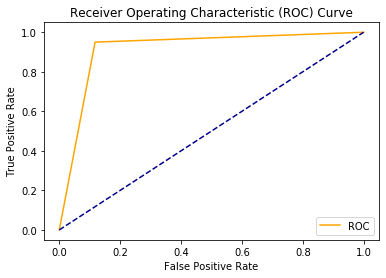

In [32]:
plot_roc_curve(fpr, tpr)

#### b. What is the area under this ROC curve? What does this tell us about our model?

In [33]:
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.9161764705882353

The area under the ROC curve is a measure of "how well a parameter can distinguish between two diagnostic groups". With an area of 0.90, this model does an excellent job of distinguishing between the two groups (breast cancer or no breast cancer).

#### c. Extra Credit: What is the optimal choice of threshold for this model to organize your "goodness" measure in part 1d? How did you find this?

I think precision is the one of the optimal choice of thresholds. This threshold tells us the proportion of positive identiication that are correct. This is incredibly important in this scenario when we care about accurately diagnosing breast cancer. We would want to know the number of breast cancer diagnoses that are accurate because misdiagnosing a woman with breast cancer can be harmful to their physical and mental health.